## TP7: Phase portraits for planar systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from matplotlib.pylab import * 
from scipy.integrate import odeint
plt.rcParams['figure.dpi'] = 300   #quality of the plot

In the previous sessions, we were mostly interested in the resolution of ODEs and systems of ODEs on a bounded interval in time. Today we focus our attention on long-time dynamics, in particular for planar systems, that is systems of two coupled ODEs.

# Exercise 1: linear case

Consider the linear system

$$
U'(t)=A U(t),\quad t>0
$$

where $U(t)=[x(t),y(t)]^{\top}$ and where $A$ is a $2\times2$ matrix with real entries. The point $[0,0]^{\top}$ is an equilibrium for this problem. 

**Q1. Assume that $\det(A)\ne \mathrm{tr}(A)^2/4$. Study the nature of this equilibrium with respect to the values of $\mathrm{tr}(A)$, $\det(A)$. In particular, what can we say when:**

$i)$ $\det(A)<0$;

$ii)$ $\det(A)>0$ and $\mathrm{tr}(A)>0$;

$iii)$ $\det(A)>0$ and $\mathrm{tr}(A)<0$;

$iv)$ $\det(A)>0$ and $\mathrm{tr}(A)=0$?

In [2]:
import bokeh;
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.layouts import row, column
from bokeh.models import Legend
output_notebook(hide_banner=True)

trA = np.linspace(-2, 2, 200)
detA = trA**2/4
fig1 = figure(x_range=(-2,2), width=400, height=300, x_axis_label='tr(A)', y_axis_label='det(A)')
fig1.line(trA,detA,legend_label = 'det(A)=tr(A)/4')
fig1.line([-2,2],[0,0],color = 'black')
fig1.line([0,0],[-0.4,1],color = 'black')
show(fig1)

*Write your answer here.*

**Q2. Characterize the equilibrium $[0,0]^{\top}$ for**

$$
A_1=\left(\begin{array}{cc}
1 & 3 \\
-1 & 1/2
\end{array}\right),\quad A_2=\left(\begin{array}{cc}
2 & 2 \\
-3 & -2
\end{array}\right),\quad A_3=\left(\begin{array}{cc}
1 & 3 \\
0 & -2
\end{array}\right),\quad A_4=\left(\begin{array}{cc}
-3 & -1 \\
6 & 1
\end{array}\right).
$$

**Use the code below to represent the corresponding vector fields as well as the solutions in the phase plane passing through the points** $[r\cos(\theta),r\sin(\theta)]$. **Take $r=0.25$ and 20 values of $\theta\in[0;2\pi]$.**

Note. We recall that if $M(t+dt)=[x(t+dt),y(t+dt)]^{\top}$, $M(t)=[x(t),y(t)]^{\top}$ are two points on a trajectory of an ODE $[x'(t),y'(t)]^{\top}=f(x,y)$, we have $M(t+dt)\approx M(t)+\vec{v}(t)dt$ so that
$$
\vec{v}(t)=\lim_{dt\to0}\cfrac{M(t+dt)-M(t)}{dt}=[x'(t),y'(t)]^{\top}=f(x,y),
$$
which shows that trajectories are tangent to the vector field.

In [3]:
def f(t,U):
    x,y =U  
    return np.array([A[0][0]*x+A[0][1]*y,A[1][0]*x+A[1][1]*y])

In [4]:
def RK4Sys(f,t0,tf,h,x0):
    """Return the vector containing the approximate values xn at times tn=t0+n*h, using RK4
    
    Parameters
    ----------
    f  : left-hand side function corresponding to the studied IVP
    t0 : initial time
    tf : final time
    h  : step size
    x0 : starting value x(t0)
    
    Returns
    -------
    x : vector of the nt values xn, with nt = int(round((tf-t0)/h))+1
    """
    nt = int(round((tf-t0)/h))+1 #number of column of the output array
    nt+= int(tf-(t0+(nt-1)*h)>1e-9) #in case tf-t0 is not a multiple of h
    t = t0

    x0_array = np.array(x0)
    neq = x0_array.size

    x = np.zeros((neq, nt))
    x[:,0] = x0_array
    
    it = 0    
    for it in range(nt-1):
        tn = t0+it*h        
        xn = x[:,it]        
        k1 = f(tn,xn)                
        k2 = f(tn+0.5*h,xn+0.5*h*k1)
        k3 = f(tn+0.5*h,xn+0.5*h*k2)
        k4 = f(tn+h,xn+h*k3)        
        x[:,it+1] = x[:,it] + h/6*(k1+2*k2+2*k3+k4)        
        t += h
        it+=1
    return x

Tr(A)= 1.5
det(A)= 3.5


(-2.0, 2.0)

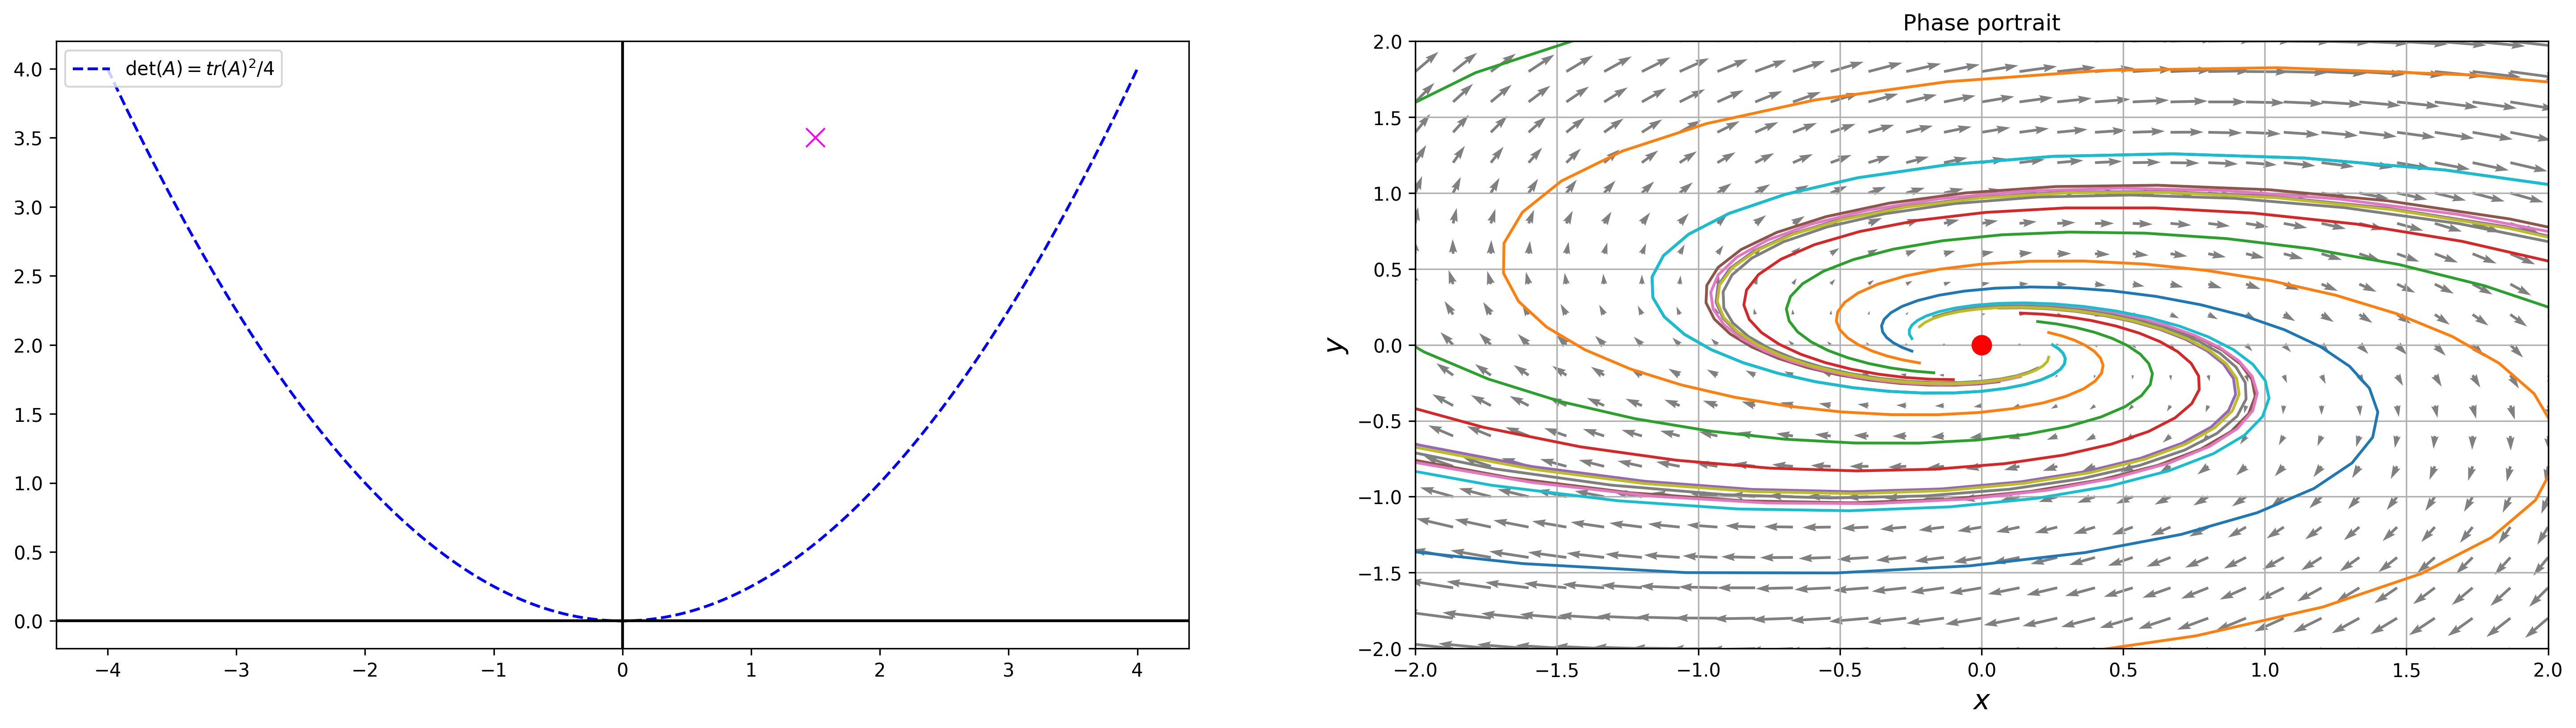

In [15]:
Atest=[[0,-1],[-1,0]]
A1=[[1,3],[-1,1/2]] # /!\ define the matrices here
A2=[[2,2],[-3,-2]]
A3=[[1,3],[0,-2]]
A4=[[-3,-1],[6,1]]
A=A1
print('Tr(A)=',np.trace(A))
print('det(A)=',np.linalg.det(A))
trA = np.linspace(-4, 4, 200)

# we display the point [tr(A), det(A)]
plt.rcParams['figure.figsize'] = [24, 6]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(trA,trA**2/4,'--',color='blue',label="$\mathrm{det}(A)=tr(A)^2/4$")
ax1.plot(np.trace(A),np.linalg.det(A),'x',ms=10,color='magenta')
ax1.legend(loc="upper left")
ax1.axhline(0, color='black')
ax1.axvline(0, color='black')
xlabel(u'$\mathrm{tr}(A)$', fontsize=12)
ylabel(u'$\mathrm{det}(A)$', fontsize=12)
    
x_equilibrium=[0] # equilibria of the system
y_equilibrium=[0]

# we compute a few trajectories
for theta in linspace(0,2*np.pi,20):
    r=0.25    
    x, y = RK4Sys(f, 0, 10, 0.1, [r*np.cos(theta), r*np.sin(theta)]) 
    ax2.plot(x, y)

# construction of the vector field
X,Y   = meshgrid(linspace(-2,2,31),linspace(-2,2,21))
tt    = linspace(0,0.2,201) #not needed here
VX,VY = f(tt,[X,Y])

ax2.title.set_text('Phase portrait')
ax2.quiver(X, Y, VX, VY,color='gray') 
ax2.plot(x_equilibrium,y_equilibrium,'o',ms=10,color='red')
grid()
plt.xlabel(u'$x$', fontsize=15)
plt.ylabel(u'$y$', fontsize=15)
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])

# Exercise 2: stability of equilibrium

Consider the system 
$$
\begin{array}{|l}
x'(t)=y(t)-y(t)^2\\
y'(t)=x(t)-x(t)^2.
\end{array}
$$

**Q1. Identify the equilibria of this system.**

We solve $x'(t) = 0$ and $y'(t) = 0$. The equlibira of the system are $(0,0)$, $(1,0)$, $(0,1)$, and $(1,1)$. 

**Q2. Study the stability of these equilibria.**

The matrix we want to study is 

\begin{equation} 
Df \left( U^* \right) = 
\begin{bmatrix} 
    0 & 1-2y^* \\ 1-2x^* & 0 
\end{bmatrix} 
\end{equation} 

**Q3. Adapting the code of the previous exercise, construct the vector field of the problem. Display the trajectories passing respectively through the points $[0.05,0]^{\top}$, $[0,0.05]^{\top}$, $[0,0.9]^{\top}$, $[0.05,0.05]^{\top}$. Comment the results.**

Note. To construct the phase portrait, one has to solve the problem for several initial conditions and then display the solutions in the plane $x, y$. For the numerical resolution, you could use the methods developped in the previous sessions. For simplicity, here we employ the command *odeint* of the scipy module. The documentation can be found here 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html.

In [19]:
def system(U,t):
    x, y = U
    return [y - y**2, x - x**2] #to modify here

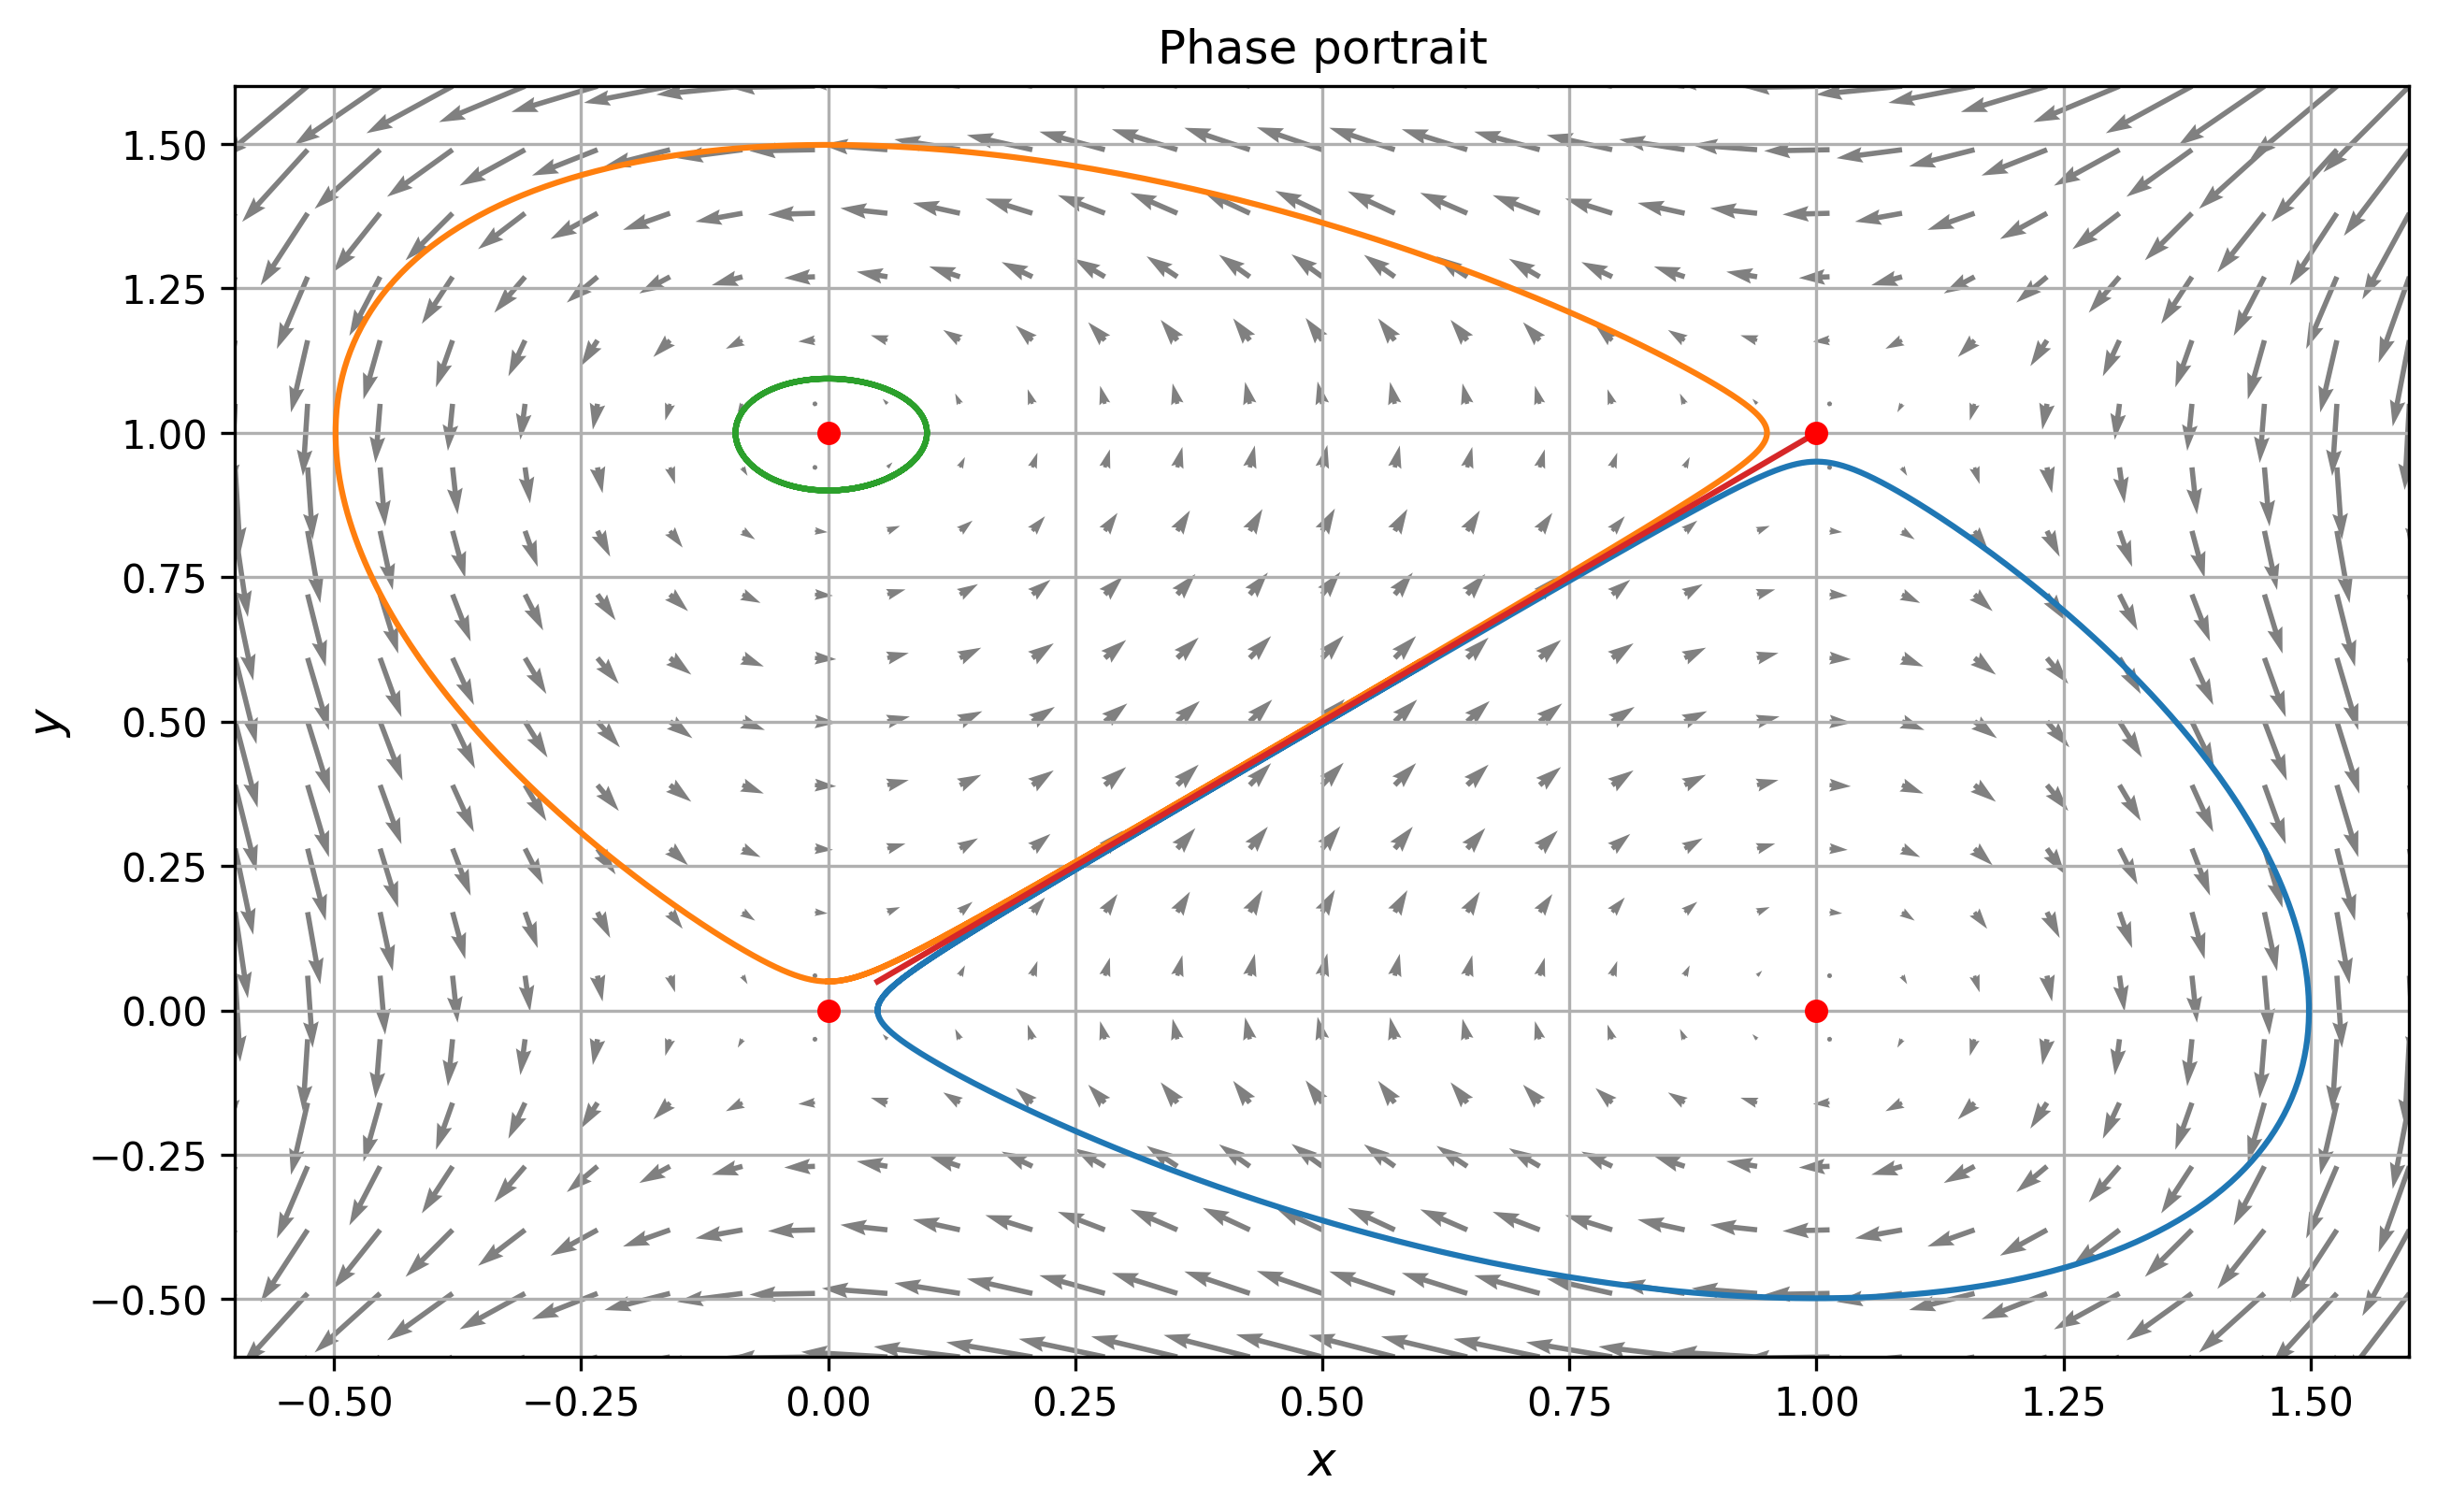

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pylab import * 
from scipy.integrate import odeint

# equilibria of the system
x_equilibrium = [0, 1, 0, 1] #to modify here
y_equilibrium = [0, 0, 1, 1] 

plt.rcParams['figure.figsize'] = [10, 6]
# we display a few trajectories
x_starting=[0.05, 0, 0, 0.05]  #to modify here 
y_starting=[0, 0.05, 0.9, 0.05]  #to modify here 
t = np.linspace(0, 20, 1000)
for i in range(len(x_starting)):    
    x, y = odeint(system, (x_starting[i], y_starting[i]), t).T
    plt.plot(x, y)

# we construct the vector field
X,Y = meshgrid(linspace(-0.6,1.6,31),linspace(-0.6,1.6,21))
tt    = linspace(0,0.2,201)
VX,VY = system((X,Y), t) #to modify here
r = sqrt(VX**2+VY**2)
quiver(X, Y, VX, VY,color='gray') 
plot(x_equilibrium,y_equilibrium,'o',ms=5,color='red')
grid()
plt.xlabel(u'$x$', fontsize=12)
plt.ylabel(u'$y$', fontsize=12)
plt.xlim(-0.6, 1.6)
plt.ylim(-0.6, 1.6)
plt.title('Phase portrait')
plt.show()

*Write your comments here.*

# Exercise 3: predator–prey model of Lotka–Volterra 

The Lotka–Volterra equations (developed in the 1920s) offer a simplistic model of the conflict between populations of predators and preys. It has been intoduced by Volterra to explain the following surprising phenomenon observed at the time by the italian fishing council: during the first world war, though fishing was extremely reduced, the proportion of sardines (preys) was considerably less important than the one of predators (in particular sharks) compare to before war, and to what it came back later.

This model is the following. Denote by $x(t)$ the number of preys (sardines) and by $y(t)$ the number of predators (sharks and others) in a certain region at time $t$. Then, given the initial population sizes $x(0)$ and $y(0)$ at time
$t = 0$, their numbers might evolve according to the autonomous system

$$
\begin{array}{ |ll}
x'(t)=ax(t)-bx(t)y(t)\\
y'(t)=-cy(t)+fx(t)y(t)
\end{array}
$$

where $a, b, c, f>0$ are constants. These ODEs reproduce certain features that make sense in this predator-prey situation:

- the population of preys is limited only by the presence of predators and without them grows exponentially because they mate (this would lead to consider the equation $x'(t)=ax(t)$);


- the population of predators depends completely on the presence of preys and without them decays exponentially (this would lead to consider the equation $y'(t)=-cy(t)$);


- each interaction prey/predator is positive for predators and negative for preys. We can assume that the number of such interactions is proportional to $x(t)y(t)$. 

If we know $a, b, c, f>0$ and the populations at a time $t_0$, this system describes the future evolution of the two populations: will they increase or decrease? to which speed? why and how does fishing influence the number of preys? This is the goal of the present exercise to answer these questions.

**Q1. Show that when $x(0)>0$ and $y(0)>0$, the populations $x(t)$, $y(t)$ are positive for all $t>0$.**



*Write your answer here.*

**Q2. Compute numerically the solution for $[x(0),y(0)]=[1500,100]$ and display on the same graph $t\mapsto x(t)$, $t\mapsto y(t)$ for $t\in[0;600]$. Display it also in the plane $x(t)$, $y(t)$. For the numerics, take $a=5\,10^{-2}$, $b=5\,10^{-4}$, $c=2\,10^{-1}$, $f=5\,10^{-4}$, $t_f=600$.**

In [24]:
def system(U, t):
    x, y = U 
    a = 5e-2 
    b = 5e-4 
    c = 2e-1 
    f = 5e-4 
    return [a*x - b*x*y, -c*y + f*x*y] #to modify here 

**Q3. Compute the equilibria of the above Lotka–Volterra system.**

The equilibria are $(0,0)$, $(c/f, a/b)$. 

**Q4. Investigate the nature of these equilibria.**

\begin{equation} 
    \begin{bmatrix} 
        a & -by^8 \\ -c & fx^* 
    \end{bmatrix}
\end{equation}

**Q5. Construct the vector field of the problem. Display the trajectories passing respectively through the points $[600,100]^{\top}$, $[1000,100]^{\top}$, $[1500,100]^{\top}$. Comment the results.**

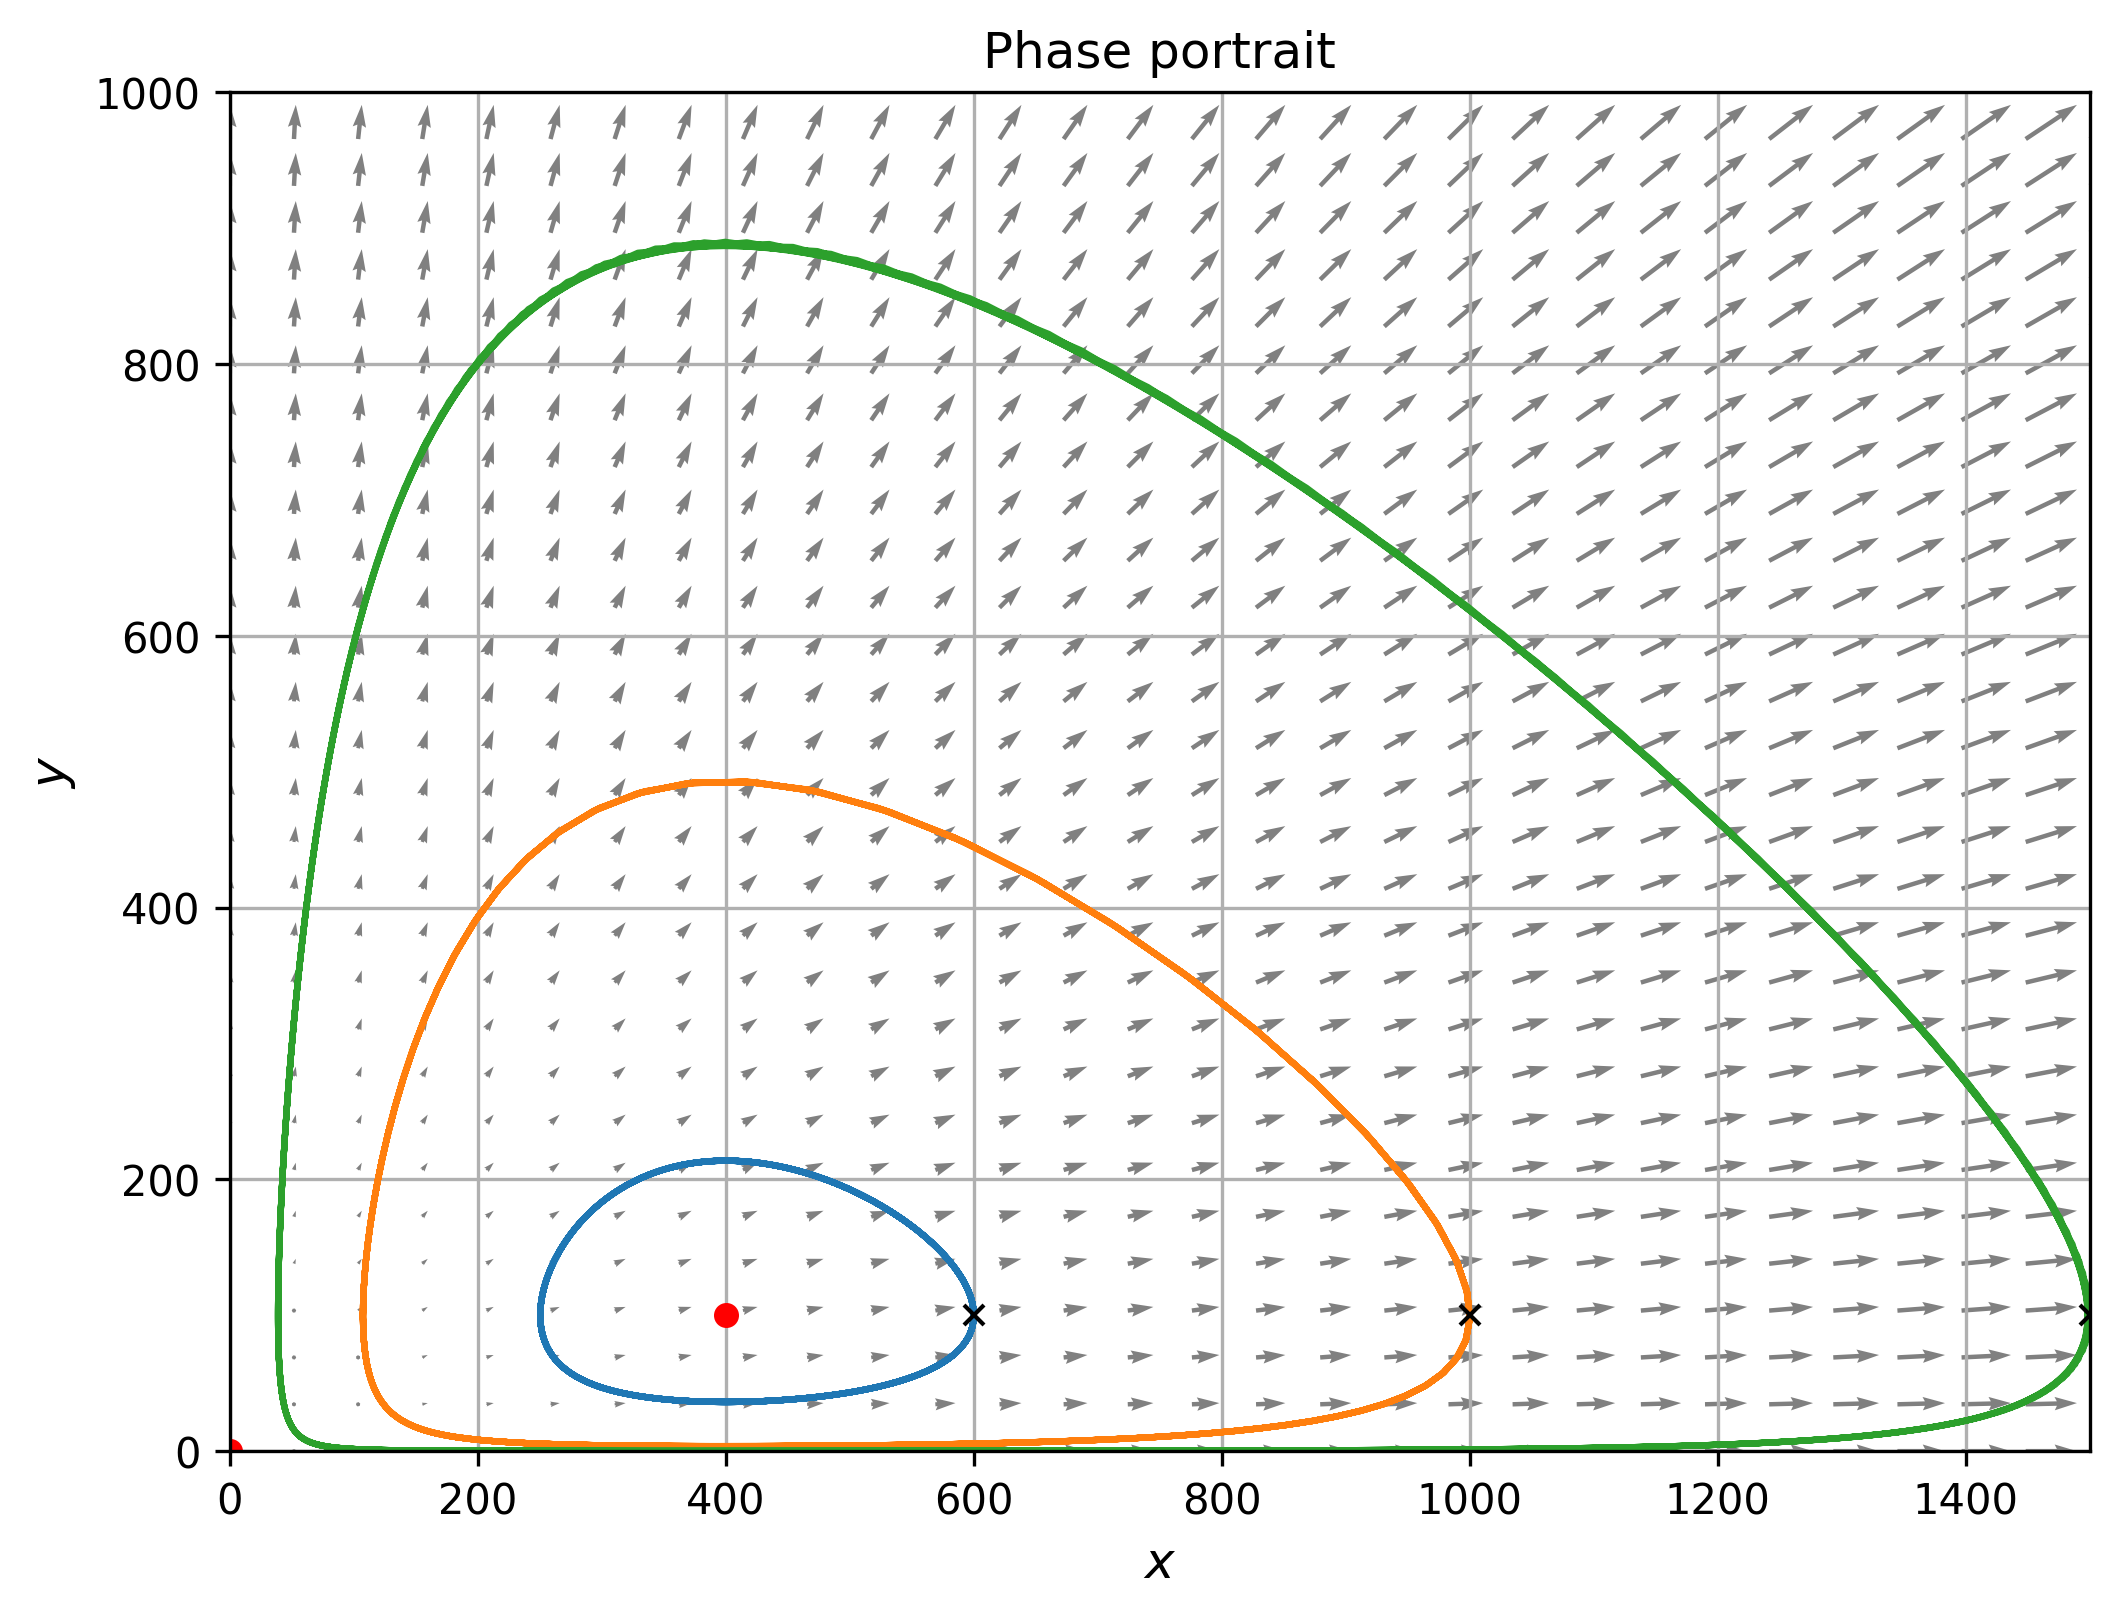

In [26]:
plt.rcParams['figure.figsize'] = [8, 6]
# equilibria of the system 
a = 5e-2 
b = 5e-4 
c = 2e-1 
f = 5e-4 
x_equilibrium=[0, c/f]  #to modify here
y_equilibrium=[0, a/b]

# we display a few trajectories
x_starting=[600, 1000, 1500] #to modify here
y_starting=[100, 100, 100]
t = np.linspace(0, 600, 1000)
for i in range(len(x_starting)):
    x, y = odeint(system, (x_starting[i], y_starting[i]), t).T #to modify here
    plt.plot(x, y)

# we compute the vector field
X,Y = meshgrid(linspace(0,1500,30),linspace(0,1000,30))
tt    = linspace(0,0.2,600)
VX,VY = X,Y #to modify here
r = sqrt(VX**2+VY**2)
quiver(X, Y, VX, VY,color='gray') 
plot(x_equilibrium,y_equilibrium,'o',ms=5,color='red')
plot(x_starting,y_starting,'x',ms=5,color='black')
grid()
plt.xlabel(u'$x$', fontsize=12)
plt.ylabel(u'$y$', fontsize=12)
plt.xlim(0,1500)
plt.ylim(0,1000)
plt.title('Phase portrait')
plt.show()

The goal of the next question is to prove that any solution of this system in $(0;+\infty)^2$ is periodic of period $T>0$. 

**Q6. i) Show that there exists a function of the form $V(x,y)=F(x)+G(y)$ on $(0;+\infty)^2$, with $F$, $G$ to determine, which is constant on the trajectories of the problem.**

**ii) Deduce that the solutions are global.**

Define the regions $A=(\frac{c}{f};+\infty)\times(0;\frac{a}{b})$, $B=(\frac{c}{f};+\infty)\times(\frac{a}{b};+\infty)$, $C=(0;\frac{c}{f})\times(\frac{a}{b};+\infty)$, $D=(0;\frac{c}{f})\times(0;\frac{a}{b})$.

**iii) Let $(x_0,y_0)$ be a point of $A$. Establish that any trajectory passing through this point enters in the region $B$ in a finite time.**

**iv) Show that for any solution $z(\cdot)=(x(\cdot),y(\cdot))$ of the problem in $(0;+\infty)^2$, there is $t_2\ne t_1$ such that $z(t_2)=z(t_1)$.**

**v) Conclude that any solution of the problem in $(0;+\infty)^2$ is periodic.**


*Write your answer here.*

**Q7. Show that the mean populations of preys and predators, defined by**

$$
\bar{x}:=\cfrac{1}{T}\int_{0}^T x(t)\,dt,\qquad \bar{y}:=\cfrac{1}{T}\int_{0}^T y(t)\,dt,
$$

**are respectively equal to $c/f$ and $a/b$.**

*Write your answer here.*

**Q8. Show the following striking property which explains what was observed during the first world war:**


<center>Fishing increases the mean population of preys $\bar{x}$.</center>

*Write your answer here.*

This exercice is adapated from *Griffiths and Higham, Numerical Methods for Ordinary Differential Equations, Springer, 2010* and *F. Jean, Cours AO102, Systèmes dynamiques, Ensta Paris*.